In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('weatherAUS.csv')

data = data.fillna(0)
data = data.replace({'Yes' : 1, 'No' : 0})
drop = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
data = data.drop(columns = drop)

data = (data - data.mean()) / data.std()
X = data.values

In [3]:
def k_means_clustering(X, k, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], k, replace = False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis = 2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis = 0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels

In [4]:
def elbow_method(X, max_clusters = 10):
    distortions = []
    
    for k in range(1, max_clusters + 1):
        centroids, labels = k_means_clustering(X, k)
        distortion = np.sum((X - centroids[labels]) ** 2)
        distortions.append(distortion)
    
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.show()

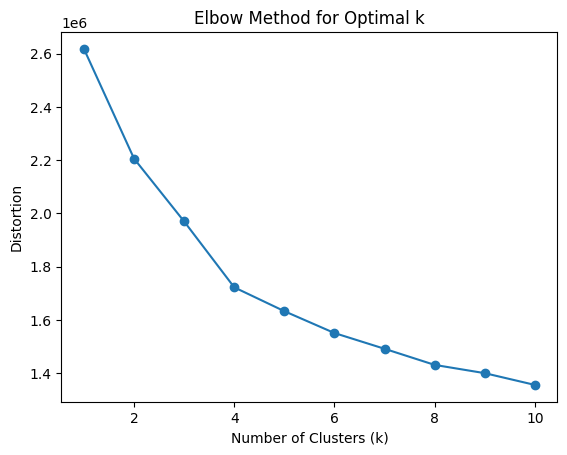

In [5]:
elbow_method(X)

In [6]:
k = 4

In [7]:
centroids, labels = k_means_clustering(X, k)

print("Cluster Centers:")
print(centroids)

Cluster Centers:
[[ 0.11858054 -0.46989425  0.71337762 -0.14664088 -0.29564805  0.45553027
   0.45345279  0.41542155  0.61259388  0.88937705  0.32007261  0.32595971
   0.8459096   0.8619079  -0.17666193 -0.4502296   1.11264151  1.00082939]
 [-0.48736777 -0.45514038 -0.02507564 -0.66825234 -0.78165466 -0.57648467
  -0.41838458 -0.63136492 -0.12317382 -0.1713902  -2.91066194 -2.9183902
  -0.52125061 -0.57868086 -0.5145925  -0.56016432 -0.03745968 -0.03660449]
 [ 0.78680933  0.97850871 -0.22762412  0.76736851  0.6385721   0.26187403
   0.24760002  0.27706757 -0.64130502 -0.54288772  0.32669871  0.32468952
  -0.06989656 -0.05058227  0.93385846  0.92187255 -0.38888122 -0.30430483]
 [-0.59927662 -0.43065242 -0.21234582 -0.37920514 -0.15243477 -0.32446225
  -0.35520002 -0.29887649  0.22362356 -0.0062251   0.34893036  0.34938335
  -0.28434371 -0.29395366 -0.54568486 -0.36478964 -0.30296884 -0.31025221]]


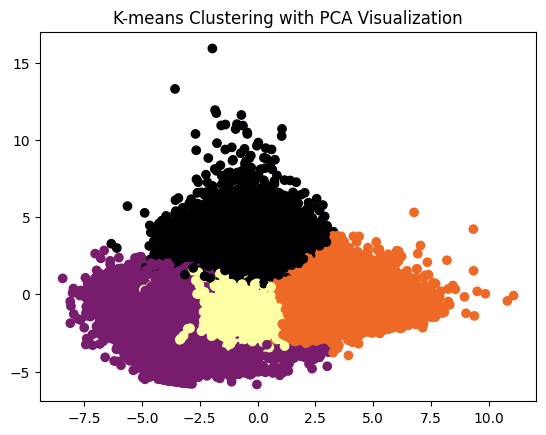

In [8]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = labels, cmap = 'inferno', alpha = 1)
plt.title('K-means Clustering with PCA Visualization')
plt.show()